<a href="https://colab.research.google.com/github/Bandna123/BK-_RevaPGDBM_MyProjects/blob/master/rfm_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dataset
import pandas as pd
dataset = pd.read_excel("cs.xlsx")
dataset.shape
dataset.head(5)

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,04-01-2019,883.93,30000041419,wrongly order punched,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,04-01-2019,530.80,30000041496,wrongly order punched,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,04-01-2019,491.07,30000041081,sales return against no:159618003/8842 dt:25-1...,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,04-01-2019,883.93,30000040955,NaN,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,04-01-2019,441.96,30000041147,customer cancel the order,-441.96,Bangalore,Karnataka


In [ ]:
dataset.isnull().sum()

Invoice_No                  0
SKU_Code                    0
Business_Partner            0
Item_Description            0
Quantity                    0
Invoice_Date                0
Unit_Price                  0
Customer_Code               0
Invoice_Description    125858
Total_Value                 0
Customer_City               0
State                       0
dtype: int64

In [ ]:
dataset.shape

(279990, 12)

In [ ]:
#drp invoice_descrption column because more then 30% are missing values
data=dataset.drop(['Invoice_Description'],axis=1)

In [ ]:
data.head(100)

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,04-01-2019,883.930,30000041419,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,04-01-2019,530.800,30000041496,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,04-01-2019,491.070,30000041081,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,04-01-2019,883.930,30000040955,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,04-01-2019,441.960,30000041147,-441.96,Bangalore,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...
95,1596180042867,411234,SHAH OPTICALS,OPTIX 6P -0550,-1,25-01-2019,530.800,30000041316,-530.80,Davangere,Karnataka
96,1596180042868,21633476,LONDON OPTICALS (UDUPI),FL UV COLORS 2PK -0250 HAZEL,-1,25-01-2019,433.040,30000057398,-433.04,Udupi,Karnataka
97,1596180042870,7239850,OPTICSUN EYEWEAR,O-F Puremoist 10 OZ (300 ML),-5,28-01-2019,374.838,30000041202,-1874.19,Bangalore,Karnataka
98,1596180042872,547594,U K OPTICAL CENTRE,DAILIES AQUACOMFORT PLUS 30-PK -0275,-1,29-01-2019,735.450,30000041419,-735.45,Bangalore,Karnataka


In [ ]:
#again check for missing count
data.isnull().sum()

Invoice_No          0
SKU_Code            0
Business_Partner    0
Item_Description    0
Quantity            0
Invoice_Date        0
Unit_Price          0
Customer_Code       0
Total_Value         0
Customer_City       0
State               0
dtype: int64

In [ ]:
#find the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279990 entries, 0 to 279989
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice_No        279990 non-null  int64  
 1   SKU_Code          279990 non-null  object 
 2   Business_Partner  279990 non-null  object 
 3   Item_Description  279990 non-null  object 
 4   Quantity          279990 non-null  int64  
 5   Invoice_Date      279990 non-null  object 
 6   Unit_Price        279990 non-null  float64
 7   Customer_Code     279990 non-null  int64  
 8   Total_Value       279990 non-null  float64
 9   Customer_City     279990 non-null  object 
 10  State             279990 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 23.5+ MB


In [ ]:
print('Duplicate data entries: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Duplicate data entries: 0


In [ ]:
#Exploring the data attributes customer city
temp = data[['Customer_Code', 'Invoice_No', 'Customer_City']].groupby(
    ['Customer_Code', 'Invoice_No', 'Customer_City']).count()
temp = temp.reset_index(drop = False)
cities = temp['Customer_City'].value_counts()
print('No. of cities in dataframe: {}'.format(len(cities)))

No. of cities in dataframe: 252


In [ ]:
temp_no_of_order_per_count = data[['Customer_Code','Customer_City']].groupby(['Customer_City']).count()
temp_no_of_order_per_count = temp_no_of_order_per_count.reset_index(drop = False)

print('-' * 10 + " City-wise order calculation "+ '-' * 10)
print
print (temp_no_of_order_per_count.sort_values(
    by='Customer_Code', ascending=False).rename(index=str,
                                        columns={"Customer_Code": "city wise number of order"}))

---------- City-wise order calculation ----------
      Customer_City  city wise number of order
149     Mumbai (MH)                      46703
169  New Delhi (DL)                      27687
3         Ahmedabad                      21374
42     Chennai (TN)                      19172
20        Bangalore                      18673
..              ...                        ...
118         Khammam                          1
1     24 Pgs(North)                          1
180      Patan (GJ)                          1
43      Chidambaram                          1
144            Moga                          1

[252 rows x 2 columns]


In [ ]:
#Exploring the data attribute : Customers and products 
pd.DataFrame([{'products': len(data['SKU_Code'].value_counts()),    
               'transactions': len(data['Invoice_No'].value_counts()),
               'customers': len(data['Customer_Code'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], 
              index = ['Quantity'])

,products,transactions,customers
Quantity,5728,92915,3197


As you can see that this dataset contain the recods of 3197 users who bought 5728 different items. There are 92915 transactions which are carried out

In [ ]:
# Now we need to explore the number of products purchased in every transaction

temp = data.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['Invoice_Date'].count()
nb_products_per_basket = temp.rename(columns = {'Invoice_Date':'Number of products'})
nb_products_per_basket[:100].sort_values('Customer_Code')

,Customer_Code,Invoice_No,Number of products
0,30000040295,16400248,1
18,30000040295,1631180039000,1
17,30000040295,66401323,1
16,30000040295,56406290,1
15,30000040295,56404978,1
...,...,...,...
70,30000040301,56400833,1
69,30000040301,16400170,1
98,30000040301,76408231,1
83,30000040301,56405114,2


In [ ]:
display(data.sort_values('Customer_Code')[:5])


,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Total_Value,Customer_City,State
208385,56404340,21600515,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 HONEY,1,27-09-2019,433.040,30000040295,433.04,Ahmedabad,Gujarat
22540,1631180039000,7239850,A AND K ENTERPRISE(VIEW POINT),O-F Puremoist 10 OZ (300 ML),2,19-01-2019,374.840,30000040295,749.68,Ahmedabad,Gujarat
160251,56402835,21690646,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 P.HAZEL,1,27-07-2019,0.000,30000040295,0.00,Ahmedabad,Gujarat
160252,56402835,21600034,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK -0225 GREEN,5,27-07-2019,433.038,30000040295,2165.19,Ahmedabad,Gujarat
160253,56402835,21690165,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK -0225 T.SAPH,5,27-07-2019,433.036,30000040295,2165.18,Ahmedabad,Gujarat


In [ ]:

df=data
df

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,04-01-2019,883.930000,30000041419,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,04-01-2019,530.800000,30000041496,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,04-01-2019,491.070000,30000041081,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,04-01-2019,883.930000,30000040955,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,04-01-2019,441.960000,30000041147,-441.96,Bangalore,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...
279985,162419004253,545045,AKSHAY EYE CARE,FRESHLOOK 1-D COL 10 - PLANO 0000 GREEN,-1,16-12-2019,441.960000,30000045392,-441.96,Mumbai,Maharashtra
279986,162419004253,545096,AKSHAY EYE CARE,FRESHLOOK 1-D COL 10 - PLANO 0000 P HAZEL,-7,16-12-2019,441.965714,30000045392,-3093.76,Mumbai,Maharashtra
279987,162419004254,21598805,KAKKA OPTICIANS,FL UV CB 2PK 0000 BROWN,-1,18-12-2019,415.090000,30000045698,-415.09,Mumbai,Maharashtra
279988,162419004254,21599949,KAKKA OPTICIANS,FL UV CB 2PK 0000 GREEN,-2,18-12-2019,415.090000,30000045698,-830.18,Mumbai,Maharashtra


In [ ]:
df = df[(df['Quantity']>0)]
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263018 entries, 1401 to 279880
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice_No        263018 non-null  int64  
 1   SKU_Code          263018 non-null  object 
 2   Business_Partner  263018 non-null  object 
 3   Item_Description  263018 non-null  object 
 4   Quantity          263018 non-null  int64  
 5   Invoice_Date      263018 non-null  object 
 6   Unit_Price        263018 non-null  float64
 7   Customer_Code     263018 non-null  int64  
 8   Total_Value       263018 non-null  float64
 9   Customer_City     263018 non-null  object 
 10  State             263018 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 24.1+ MB


In [ ]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

Invoice_No :  86302
SKU_Code :  5716
Business_Partner :  3183
Item_Description :  5713
Quantity :  185
Invoice_Date :  319
Unit_Price :  1530
Customer_Code :  3132
Total_Value :  1654
Customer_City :  248
State :  22


In [ ]:
#%% determine first and last order date
df['Invoice_Date'].min()
df['Invoice_Date'].max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
now = dt.datetime(2019,12,31)
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

/home/arvind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#%% create RFM table
rfmTable = df.groupby('Customer_Code').agg({
        'Invoice_Date':  lambda x: (now - x.max()).days,      #recency
        'Invoice_No':    lambda x: len(x),                    #frequency
        'Total_Value':   lambda x: x.sum()})                  #monetary
rfmTable['Invoice_Date'] = rfmTable['Invoice_Date'].astype(int)

In [ ]:
rfmTable['Invoice_Date'] = rfmTable['Invoice_Date'].astype(int)

#%% convert invoice date to integer and rename columns for RFM
rfmTable.rename(columns={
        'Invoice_Date':  'Recency', 
        'Invoice_No':    'Frequency', 
        'Total_Value':   'Monetary'}, inplace=True)

In [ ]:
#%% shift rfmTable data to quantiles for segmentation
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 5.0, 0.5: 23.0, 0.75: 59.0},
 'Frequency': {0.25: 14.0, 0.5: 37.0, 0.75: 89.0},
 'Monetary': {0.25: 10701.935000000001, 0.5: 31989.91, 0.75: 92529.67}}

In [ ]:
#%% create a segmented RFM table
rfmSegment = rfmTable.copy()

In [ ]:
#%% create functions for calculating scores per order
def scoreRecency(x,p,d): # low recency is best and is assigned 1
    if x <= d[p][0.25]:return 1
    elif x <= d[p][0.50]:return 2
    elif x <= d[p][0.75]:return 3
    else:return 4

In [ ]:
def scoreFrequency(x,p,d): # high frequency is best and is assigned 1
    if x <= d[p][0.25]:return 4
    elif x <= d[p][0.50]:return 3
    elif x <= d[p][0.75]:return 2
    else:return 1

In [ ]:
def scoreMonetary(x,p,d): # high monetary is best and is assigned 1
    if x <= d[p][0.25]:return 4
    elif x <= d[p][0.50]:return 3
    elif x <= d[p][0.75]:return 2
    else:return 1

In [ ]:
#%% create new columns for RFM and assign values based on quantile
rfmSegment['R_qt'] = rfmSegment['Recency'].apply(scoreRecency, args=('Recency',quantiles,))
rfmSegment['F_qt'] = rfmSegment['Frequency'].apply(scoreFrequency, args=('Frequency',quantiles,))
rfmSegment['M_qt'] = rfmSegment['Monetary'].apply(scoreMonetary, args=('Monetary',quantiles,))
rfmSegment.head()


,Recency,Frequency,Monetary,R_qt,F_qt,M_qt
Customer_Code,,,,,,
30000040295,32,33,25121.38,3,3,3
30000040297,1,151,74831.35,1,1,2
30000040301,0,195,153532.74,1,1,1
30000040302,0,162,109917.62,1,1,1
30000040303,4,50,40630.88,1,2,2


In [ ]:
#%% calculate total RFM score as string composed of individual RFM quantiles
rfmSegment['RFM'] = rfmSegment.R_qt.map(str) \
                  + rfmSegment.F_qt.map(str) \
                  + rfmSegment.M_qt.map(str)

In [ ]:
#%% translate raw RFM values to log values for plotting, common log
import seaborn as sns
import numpy as np
rfmSegment = rfmSegment.assign(R_lg = lambda x: np.log10(x.Recency))
rfmSegment = rfmSegment.assign(F_lg = lambda x: np.log10(x.Frequency))
rfmSegment = rfmSegment.assign(M_lg = lambda x: np.log10(x.Monetary))

/home/arvind/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#%% isolate to high/low value customers and sort by customer monetary value
bestCustomers = rfmSegment[rfmSegment['RFM'].isin(['311', '411'])].sort_values('Monetary', ascending=False)
worstCustomers = rfmSegment[rfmSegment['RFM'] == '444'].sort_values('Monetary', ascending=False)

/home/arvind/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1673: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


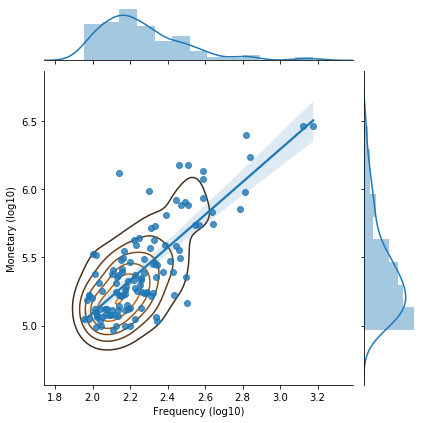

In [ ]:
#%% plot frequency versus monetary of best customers
g = sns.JointGrid(x="F_lg", y="M_lg", data=bestCustomers, size=6)
g = g.plot(sns.regplot, sns.distplot). \
    plot_joint(sns.kdeplot, zorder=0, n_levels=6). \
    set_axis_labels("Frequency (log10)", "Monetary (log10)")

/home/arvind/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


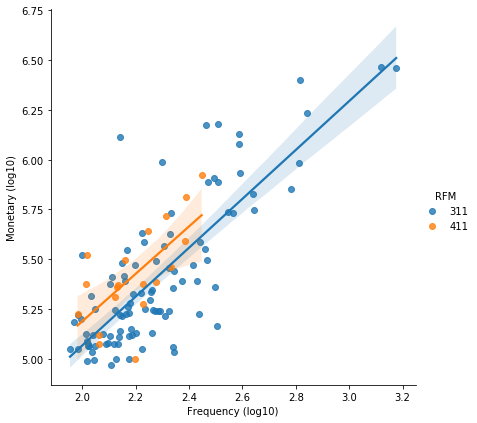

In [ ]:
#%% use hue argument to provide a factor variable by RFM score
h = sns.lmplot(x="F_lg", y="M_lg", data=bestCustomers, size=6, hue='RFM'). \
    set_axis_labels("Frequency (log10)", "Monetary (log10)")
